<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-loader" data-toc-modified-id="Data-loader-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data loader</a></span></li></ul></div>

# Подключение библиотек

In [9]:
import pandas as pd
import json
import torch
import os

from skimage import io, transform
import matplotlib.pyplot as plt

import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet18

from PIL import Image
import numpy as np

## Data loader

In [46]:
class PlanesDataset(Dataset):
    
    def __init__(self, annotation_file, root_dir, transform=None):
        
        with open('/home/alex/Рабочий стол/python/yandex/planes/labels.json') as json_file:
            self.annotation = json.load(json_file)
            
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotation)

    def __getitem__(self, idx):
        #if torch.is_tensor(idx):
         #   idx = idx.tolist()
       
        annotation = self.annotation[idx]
        path = annotation['data']['image']
        
        image = Image.open(path)
        
        image_2_npArray = np.asarray(image)
        image = torchvision.transforms.ToTensor()(image_2_npArray)
 
        value = annotation['annotations'][0]['result'][0]['value']
        
        return image, int(value['x'] + (value['width'] / 2)), int(value['y'] + (value['height'] / 2)) 


In [47]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

In [48]:
planes_dataset = PlanesDataset(annotation_file='/home/alex/Рабочий стол/python/yandex/planes/labels.json',
                                    root_dir='/home/alex/Рабочий стол/python/yandex/planes/data/')


In [49]:
def show_image(img_tensor):
    image = np.moveaxis(img_tensor.numpy(), 0, 2)
    plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


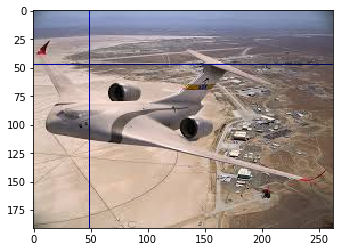

In [53]:
img_tensor, x, y = planes_dataset[26]

for i in range(0, img_tensor.size()[2]):
    img_tensor[0 : 2, y, i] = -1

for i in range(0, img_tensor.size()[1]):
    img_tensor[0 : 2, i, x] = -1    
    
show_image(img_tensor)

In [45]:
y

13.612565445026178